# Analyse Polish Dataset


In [ ]:
# | eval: false
%load_ext autoreload
%autoreload 2

In [ ]:
# | eval: false
import polars as pl

from juddges.settings import PL_JUDGEMENTS_PATH_RAW

In [ ]:
# | eval: false
ds = pl.read_parquet(PL_JUDGEMENTS_PATH_RAW, use_pyarrow=True)

In [ ]:
# | eval: false
dt_fmt = "%Y-%m-%d %H:%M:%S%.f %Z"
dt_unit = "ms"  # due to https://github.com/pola-rs/polars/issues/13592

ds = ds.with_columns(
    ds["date"].str.to_datetime(format=dt_fmt, time_unit=dt_unit),
    ds["publicationDate"].str.to_datetime(format=dt_fmt, time_unit=dt_unit),
    ds["lastUpdate"].str.to_datetime(format=dt_fmt, time_unit=dt_unit),
    ds["courtId"].cast(pl.Int32),
    ds["departmentId"].cast(pl.Int32),
    ds["type"].cast(pl.Categorical),
)

ds.head()

_id,signature,date,publicationDate,lastUpdate,courtId,departmentId,type,excerpt,content,thesis
str,str,datetime[ms],datetime[ms],datetime[ms],i32,i32,cat,str,str,str
"""15450500000512…","""XVII AmA 14/94…",1994-07-20 02:00:00,2018-06-13 22:10:05,2018-06-13 16:22:22,15450500,5127,"""SENTENCE, REAS…","""Sygn. akt. XVI…","""<?xml version=…",null
"""15150000000100…","""II AKa 31/98""",1998-03-26 01:00:00,2013-02-08 02:01:01,2013-12-04 17:23:33,15150000,1006,"""SENTENCE, REAS…","""Sygn. akt : II…","""<?xml version=…",null
"""15150000000100…","""II AKa 43/99""",1999-04-08 02:00:00,2013-03-21 02:01:01,2014-07-23 09:53:56,15150000,1006,"""SENTENCE, REAS…","""Sygn. akt : II…","""<?xml version=…",null
"""15150000000100…","""II AKa 72/99""",1999-05-13 02:00:00,2013-03-21 02:01:01,2014-07-23 09:55:38,15150000,1006,"""SENTENCE, REAS…","""Sygn. akt: II …","""<?xml version=…",null
"""15150000000100…","""II AKa 115/99""",1999-05-20 02:00:00,2013-03-26 02:01:00,2014-07-23 09:54:43,15150000,1006,"""SENTENCE, REAS…","""Sygn. akt: II …","""<?xml version=…",null


In [ ]:
# | eval: false
ds.describe()

statistic,_id,signature,date,publicationDate,lastUpdate,courtId,departmentId,type,excerpt,content,thesis
str,str,str,str,str,str,f64,f64,str,str,str,str
"""count""","""414148""","""414148""","""414148""","""414148""","""414148""",414148.0,414148.0,"""414148""","""414148""","""408423""","""39726"""
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""5725""","""374422"""
"""mean""",null,null,"""2017-05-17 10:…","""2017-11-25 18:…","""2018-12-30 17:…",1.5292e7,26703.482951,null,null,null,null
"""std""",null,null,null,null,null,158951.795845,319101.484112,null,null,null,null
"""min""","""15050000000050…","""I 1 C 1047/15""","""1994-07-20 02:…","""2012-11-27 14:…","""2012-05-09 22:…",1.505e7,303.0,null,"""'Sygn. akt II …","""<?xml version=…",""""" W sytuacji …"
"""25%""",null,null,"""2015-02-19 01:…","""2015-08-18 20:…","""2016-11-30 14:…",1.51515e7,1003.0,null,null,null,null
"""50%""",null,null,"""2017-01-18 01:…","""2017-07-25 22:…","""2018-07-05 12:…",1.5251015e7,1521.0,null,null,null,null
"""75%""",null,null,"""2019-04-08 02:…","""2020-02-05 18:…","""2021-07-13 12:…",1.54505e7,3021.0,null,null,null,null
"""max""","""15551555000151…","""XXVIII Cz 72/2…","""3013-12-04 01:…","""2024-03-06 18:…","""2024-03-06 19:…",1.5551555e7,7.020003e6,null,"""‰Sygn. akt II …","""<?xml version=…","""…”zasiedzenie …"


In [ ]:
# | eval: false
ds["type"].value_counts()

type,count
cat,u32
"""SENTENCE, REAS…",240603
"""REASON""",43257
"""DECISION, REAS…",36991
"""SENTENCE""",58626
"""REGULATION, DE…",3565
…,…
"""REGULATION, SE…",1
"""REGULATION, RE…",8
"""REGULATION, RE…",27


In [ ]:
# | eval: false
print(f"Missing content: {ds['content'].null_count() / len(ds)}")
print(f"Missing theis: {ds['thesis'].null_count() / len(ds)}")
print(f"Missing excerpt: {ds['excerpt'].null_count() / len(ds)}")

Missing content: 0.01382356065947439
Missing theis: 0.9040777692998638
Missing excerpt: 0.0


<Axes: title={'center': 'Excerpt #chars distribution'}, ylabel='Frequency'>

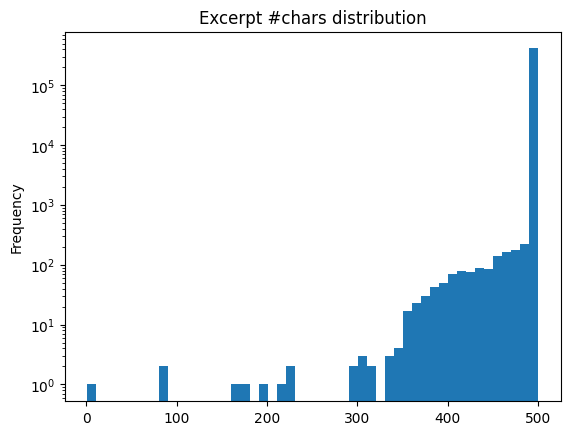

In [ ]:
# | eval: false
ds["excerpt"].str.strip_chars().str.len_chars().to_pandas().plot.hist(
    bins=50, log=True, title="Excerpt #chars distribution"
)